<a href="https://colab.research.google.com/github/pvanik1/FastAI/blob/master/Practice_apparel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made for the Analytics Vidhya practice problem: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *
from fastai.callbacks.hooks import *

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
pwd

'/content'

In [0]:
from google.colab import files
files.upload()

Saving train_LbELtWX.zip to train_LbELtWX.zip


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train_LbELtWX.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [0]:
import os
path = Path(os.getcwd())

In [0]:
print(path)

/content


In [0]:
df = pd.read_csv(path/'train.csv', header='infer')
df.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [0]:
tfms = get_transforms(do_flip = True, flip_vert = False, max_rotate = 0, max_zoom = 1, max_lighting = None, max_warp = 0.1, p_affine = 0.5, p_lighting = 0.5)
print(tfms)

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True), RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.1, 0.1)}, p=0.5, resolved={}, do_run=True, is_random=True)], [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])


In [28]:
path = path/'train'
print(path)

/content/train


In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=28, suffix='.png')

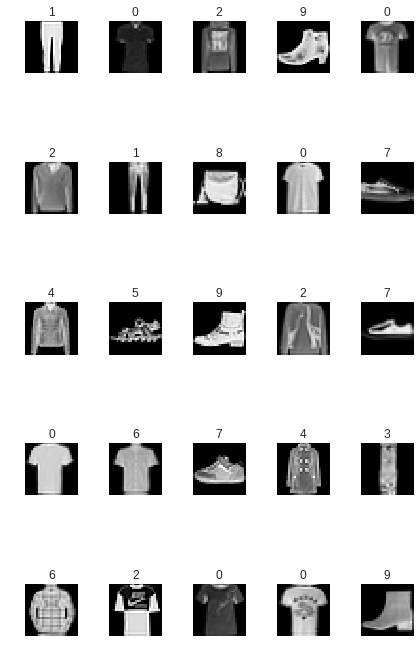

In [36]:
data.show_batch(rows=5, figsize=(6,10))

In [39]:
learn = create_cnn (data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 77035282.82it/s]


In [40]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.818264,0.647686,0.242750,01:38
1,0.586867,0.504114,0.190500,01:36
2,0.509259,0.411861,0.152750,01:36
3,0.463218,0.378002,0.139917,01:36
4,0.459163,0.368159,0.135917,01:36


In [0]:
learn.save('stage-1')

In [42]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.465098,0.371658,0.136500,01:32
1,0.429754,0.348117,0.127917,01:33
2,0.412002,0.332847,0.125417,01:33


In [43]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.409215,0.331577,0.123750,01:34
1,0.376066,0.315511,0.118083,01:35


In [0]:
learn.save('stage-1')

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


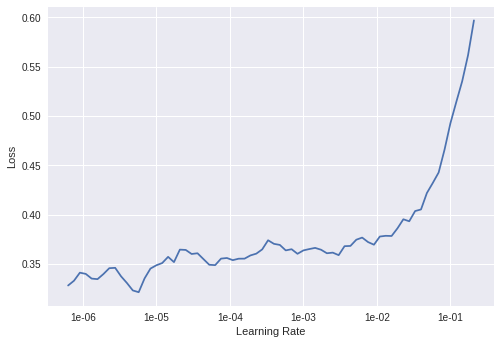

In [47]:
learn.recorder.plot()

In [48]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=2e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.371211,0.311284,0.116333,01:43
1,0.360843,0.307442,0.114250,01:42


In [0]:
learn.save('A')

In [50]:
learn = create_cnn (data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [51]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.835903,0.655938,0.242333,01:31
1,0.609019,0.485558,0.177833,01:33
2,0.525493,0.409203,0.151333,01:32
3,0.456735,0.378477,0.142667,01:34
4,0.423414,0.371762,0.138917,01:36


In [0]:
learn.save('B')

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


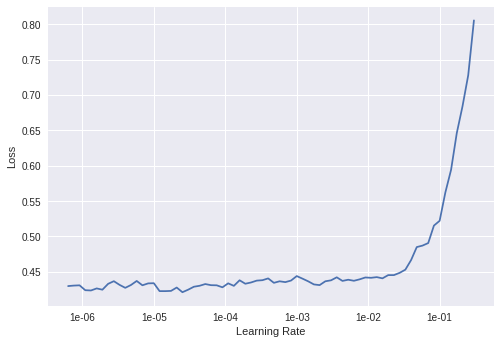

In [54]:
learn.recorder.plot()

In [55]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr = 1.5e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.394672,0.332256,0.125750,01:47
1,0.342458,0.288267,0.109583,01:49
2,0.320493,0.260136,0.099417,01:47
3,0.297358,0.247636,0.093000,01:45
4,0.275749,0.244983,0.092833,01:48


In [0]:
data_norm = data.normalize(imagenet_stats)

In [0]:
learn.save('B')

In [58]:
learn = cnn_learner(data_norm, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.881180,0.699513,0.256417,01:38
1,0.645677,0.515383,0.189583,01:38
2,0.522344,0.430877,0.163333,01:38
3,0.456597,0.390060,0.148083,01:39
4,0.445469,0.384702,0.143333,01:41


In [60]:
data_default_transforms = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(), size=28, suffix='.png')
learn = cnn_learner(data_default_transforms, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.905462,0.693727,0.264667,02:11
1,0.670979,0.515300,0.192417,02:09
2,0.574969,0.448757,0.167417,02:12
3,0.544197,0.418959,0.154417,02:11
4,0.521585,0.411307,0.153750,02:11


In [61]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(5)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:04, 21525027.86it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.796541,0.622288,0.228083,01:59
1,0.548622,0.455358,0.167333,01:53
2,0.455117,0.368522,0.133583,01:55
3,0.392078,0.336826,0.124750,01:51
4,0.390987,0.331101,0.123250,01:52


In [0]:
learn.save('E')

In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


AttributeError: ignored

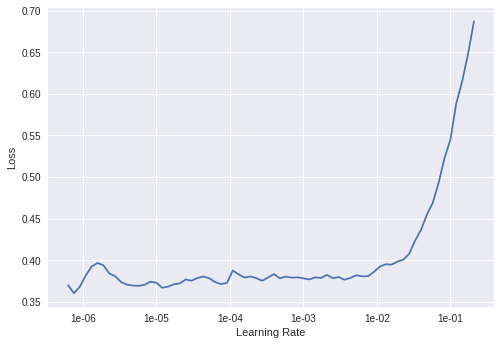

In [64]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10,max_lr=slice(1.1e-6,1.05e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.378426,0.328434,0.120583,02:07
1,0.371410,0.315185,0.119500,02:09
